<a href="https://colab.research.google.com/github/shekhs/Hotel-Booking-Prediction/blob/main/hotel_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Hotel Booking Cancellation EDA and Prediction</strong></p>

<img style="margin-left: 10%; float: center;  border:5px solid #ffb037; width:80%; height : 80%;" src = https://www.rd.com/wp-content/uploads/2017/11/this-hotel-booking-secret-guarantees-you-ll-get-the-cheapest-rate-possible_520663291-rawpixel-com-1024x683.jpg> 

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [EDA](#2.0)
    * [From where the most guests are coming ?](#2.1)
    * [How much do guests pay for a room per night?](#2.2)
    * [How does the price vary per night over the year?](#2.3)
    * [Which are the most busy months?](#2.4)
    * [How long do people stay at the hotels?](#2.5)
    
* [Data Pre Processing](#3.0)
* [Model Building](#4.0)
    * [Logistic Regression](#4.1)
    * [Knn](#4.2)
    * [Decision Tree Classifier](#4.3)
    * [Random Forest Classifier](#4.4)
    * [Ada Boost Classifier](#4.5)
    * [Gradient Boosting Classifier](#4.6)
    * [XgBoost](#4.7)
    * [Cat Boost Classifier](#4.8)
    * [Extra Trees Classifier](#4.9)
    * [LGBM Classifier](#4.10)
    * [ANN](#4.11)
    * [Voting Classifier](#4.12)

* [Models Comparison](#5.0)


In [1]:
!pip install catboost
!pip install xgboost
!pip install folium
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [3]:
# reading data
df = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


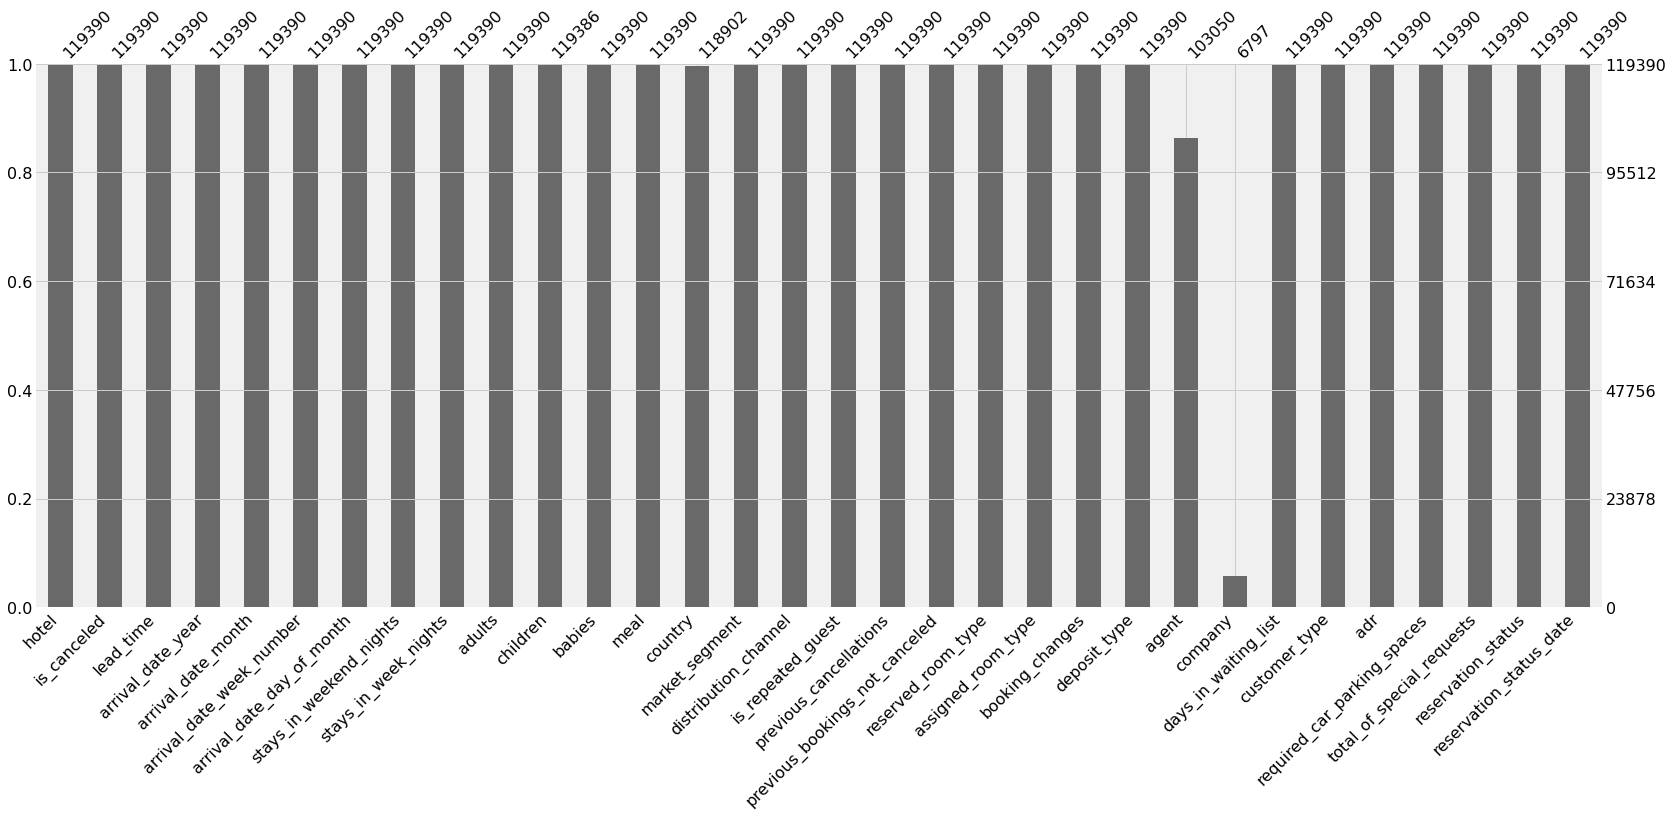

In [7]:
# visualizing null values
msno.bar(df)
plt.show()

In [8]:
# filling null values with zero

df.fillna(0, inplace = True)

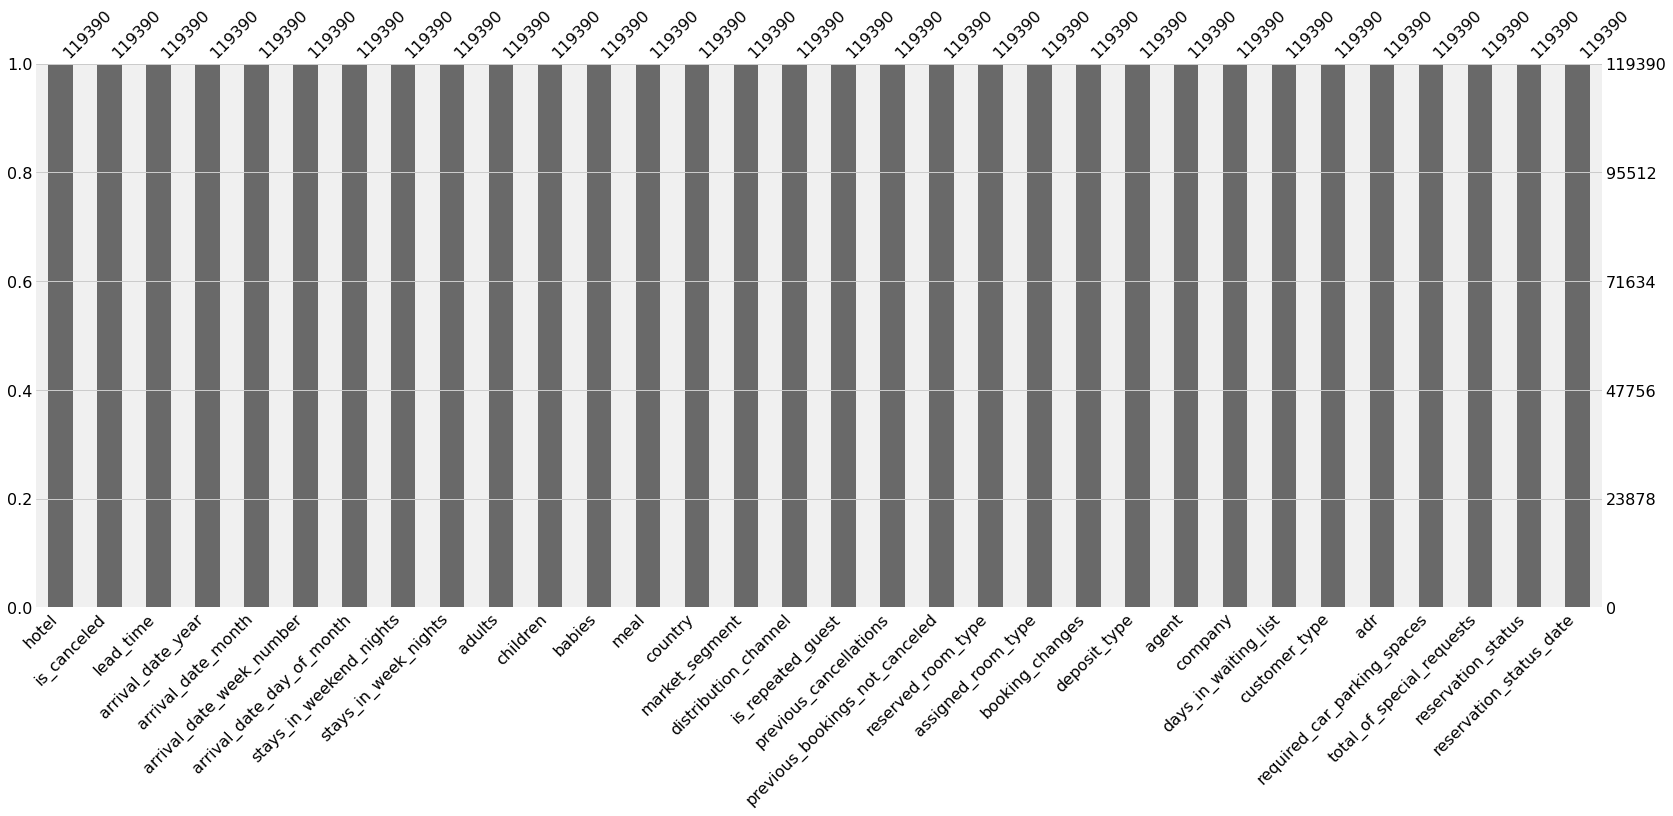

In [9]:
# visualizing null values
msno.bar(df)
plt.show()

In [10]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [11]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

<a id = '2.1'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>From where the most guests are coming ?.</strong></p> 

In [12]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [13]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.</strong></p> 

<a id = '2.2'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How much do guests pay for a room per night?</strong></p> 

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.</strong></p> 

In [15]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The figure shows that the average price per room depends on its type and the standard deviation.</strong></p> 

<a id = '2.3'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How does the price vary per night over the year?</strong></p> 

In [16]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [20]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel.sort_values(by='adr',ascending=False)

,arrival_date_month,adr
1,August,181.205892
5,July,150.122528
6,June,107.974850
11,September,96.416860
8,May,76.657558
0,April,75.867816
2,December,68.410104
10,October,61.775449
7,March,57.056838
3,February,54.147478


In [21]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [25]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.</strong></p>

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>So, first we have to provide right hierarchy to month column.</strong></p>

In [26]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=9fe32d97a3e9e0b9afd31f2b8c1e3f8ab3db4213452a0aa1cb8c3ebd563a44b3
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=9e045124f63db3c3c9e7da05b1d02d9bbe7385e7568519b05f85c3c34f4fc691
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [27]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [28]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [29]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .</strong></p>

<a id = '2.4'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Which are the most busy months?</strong></p> 

In [31]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [32]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [33]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [34]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [35]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

<ul>
    <li style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower.</strong></li>
    <li style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Both hotels have the fewest guests during the winter.</strong></li>
</ul>

<a id = '2.5'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>How long do people stay at the hotels?</strong></p> 

In [36]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [37]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [38]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [39]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

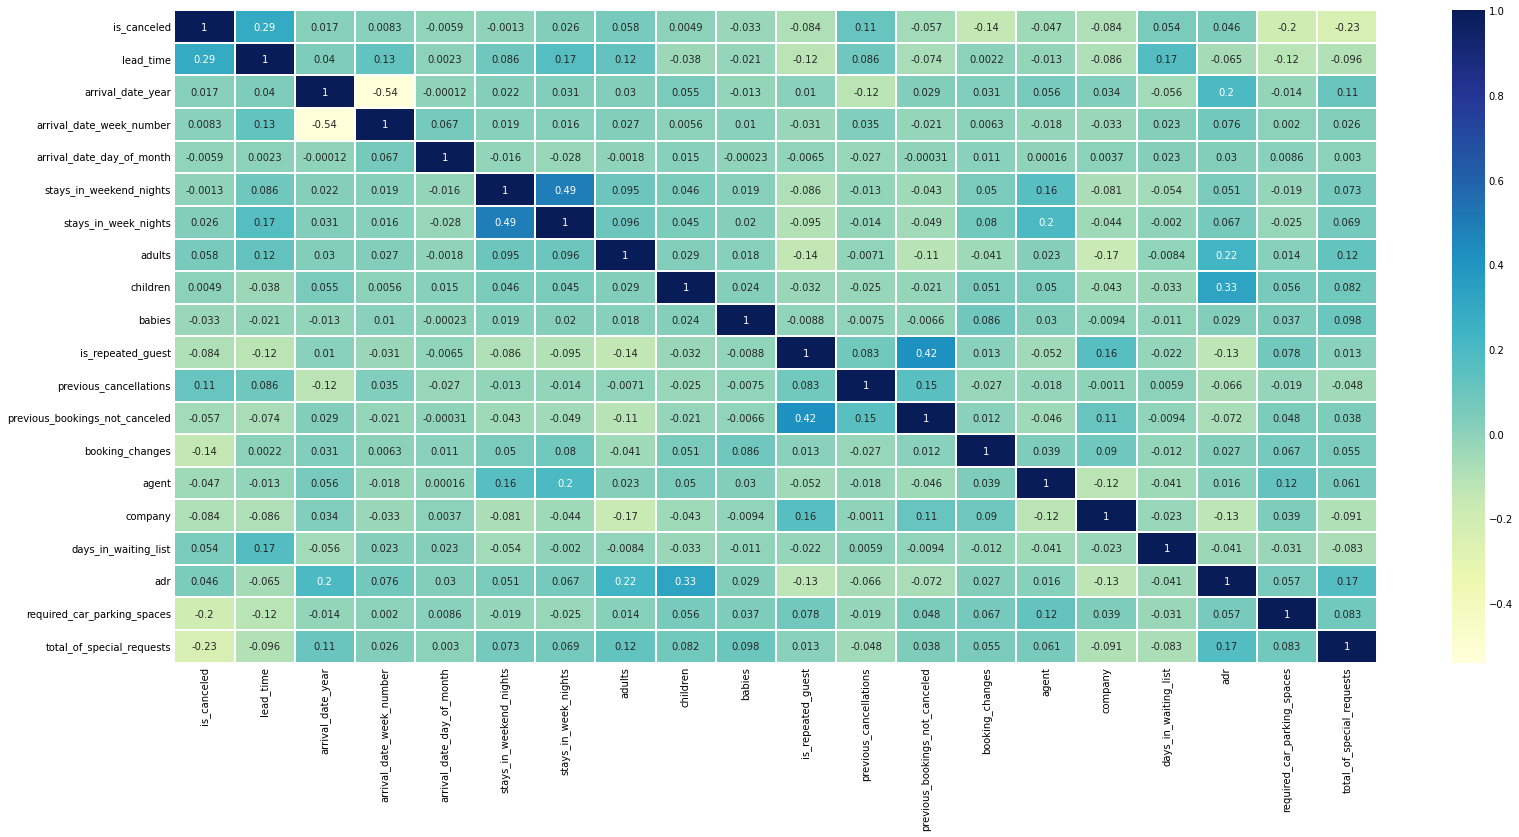

In [40]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1,cmap="YlGnBu")
plt.show()


In [41]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [42]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03


In [44]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [45]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [46]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [47]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [48]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [49]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [50]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [51]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [52]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [53]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [54]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [55]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [56]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [57]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [58]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [59]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [60]:
X.shape, y.shape

((119210, 26), (119210,))

In [61]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [62]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
2252,0,2,3,2,2,0,2,0,10,14,5.164786,3.737670,2.079442,2,5,1,0.0,0,0,0,0,5.147494,0.0,4.219508,0,1
45727,1,0,5,2,1,0,2,0,11,27,4.574711,3.871201,3.091042,2,4,1,0.0,0,0,0,0,3.637586,0.0,4.262680,0,0
48520,1,0,2,2,2,0,0,2,2,14,3.737670,2.639057,3.258097,0,2,2,0.0,0,0,0,0,2.302585,0.0,4.951593,0,0
61142,1,3,2,2,1,0,0,2,11,23,3.583519,3.912023,1.098612,2,2,2,0.0,0,0,0,0,2.302585,0.0,4.328098,0,2
112333,1,3,2,2,1,0,0,3,5,23,2.995732,3.044522,3.044522,2,1,1,0.0,0,0,0,0,2.079442,0.0,4.603168,0,1


In [63]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
99288,1,0,0,0,2,0,0,2,10,12,1.945910,3.737670,2.079442,2,3,3,0.0,0,0,0,0,0.000000,0.0,5.020256,0,1
105280,1,3,2,2,1,0,0,3,2,4,4.290459,1.791759,1.098612,0,2,2,0.0,0,0,0,0,2.302585,0.0,4.280547,0,1
8385,0,0,2,2,1,0,0,2,9,14,4.948760,3.713572,3.258097,2,5,2,0.0,0,0,0,0,5.484797,0.0,4.531093,0,1
31807,0,0,2,2,1,0,0,3,1,7,4.304065,0.693147,1.098612,1,4,2,0.0,0,0,0,0,5.493061,0.0,3.658420,0,1
13387,0,0,2,2,1,0,0,3,4,6,5.429346,3.526361,2.639057,2,2,2,0.0,0,0,0,0,5.484797,0.0,5.108609,0,1


In [64]:
y_train.head(), y_test.head()

(2252      0
 45727     0
 48520     1
 61142     1
 112333    0
 Name: is_canceled, dtype: int64, 99288     0
 105280    0
 8385      1
 31807     0
 13387     1
 Name: is_canceled, dtype: int64)

<a id = '4.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

<a id = '4.1'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p> 

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8107261695047955
Confusion Matrix : 
[[21374  1112]
 [ 5657  7620]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22486
           1       0.87      0.57      0.69     13277

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



<a id = '4.2'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.889746385929592
Confusion Matrix : 
[[21680   806]
 [ 3137 10140]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     22486
           1       0.93      0.76      0.84     13277

    accuracy                           0.89     35763
   macro avg       0.90      0.86      0.88     35763
weighted avg       0.89      0.89      0.89     35763



<a id = '4.3'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9462852668959539
Confusion Matrix : 
[[21521   965]
 [  956 12321]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22486
           1       0.93      0.93      0.93     13277

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



<a id = '4.4'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p> 

In [68]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9547297486228784
Confusion Matrix : 
[[22307   179]
 [ 1440 11837]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22486
           1       0.99      0.89      0.94     13277

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



<a id = '4.5'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p> 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [69]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9464250761960685
Confusion Matrix : 
[[21522   964]
 [  952 12325]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22486
           1       0.93      0.93      0.93     13277

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



<a id = '4.6'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p> 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [70]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9089282219053212
Confusion Matrix : 
[[22306   180]
 [ 3077 10200]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22486
           1       0.98      0.77      0.86     13277

    accuracy                           0.91     35763
   macro avg       0.93      0.88      0.90     35763
weighted avg       0.92      0.91      0.91     35763



<a id = '4.7'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>XgBoost Classifier</strong></p> 

https://xgboost.readthedocs.io/en/stable/parameter.html#parameters-for-tree-booster

https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9

In [71]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9831110365461511
Confusion Matrix : 
[[22479     7]
 [  597 12680]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22486
           1       1.00      0.96      0.98     13277

    accuracy                           0.98     35763
   macro avg       0.99      0.98      0.98     35763
weighted avg       0.98      0.98      0.98     35763



<a id = '4.8'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p> 

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [72]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4768062	total: 67ms	remaining: 6.63s
1:	learn: 0.4102974	total: 88.7ms	remaining: 4.34s
2:	learn: 0.3888303	total: 109ms	remaining: 3.51s
3:	learn: 0.3625005	total: 126ms	remaining: 3.02s
4:	learn: 0.3242839	total: 146ms	remaining: 2.78s
5:	learn: 0.2735295	total: 167ms	remaining: 2.61s
6:	learn: 0.2397326	total: 186ms	remaining: 2.46s
7:	learn: 0.2305961	total: 208ms	remaining: 2.39s
8:	learn: 0.1985249	total: 227ms	remaining: 2.29s
9:	learn: 0.1843244	total: 245ms	remaining: 2.2s
10:	learn: 0.1732449	total: 264ms	remaining: 2.14s
11:	learn: 0.1662415	total: 284ms	remaining: 2.08s
12:	learn: 0.1506780	total: 306ms	remaining: 2.05s
13:	learn: 0.1409953	total: 326ms	remaining: 2s
14:	learn: 0.1340788	total: 349ms	remaining: 1.98s
15:	learn: 0.1325217	total: 367ms	remaining: 1.93s
16:	learn: 0.1257144	total: 386ms	remaining: 1.88s
17:	learn: 0.1187405	total: 405ms	remaining: 1.84s
18:	learn: 0.1081931	total: 428ms	remaining: 1.82s
19:	learn: 0.1044381

In [73]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9954422168162627
Confusion Matrix : 
[[22469    17]
 [  146 13131]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22486
           1       1.00      0.99      0.99     13277

    accuracy                           1.00     35763
   macro avg       1.00      0.99      1.00     35763
weighted avg       1.00      1.00      1.00     35763



*italicized text*<a id = '4.9'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p> 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [74]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9520174482006543
Confusion Matrix : 
[[22244   242]
 [ 1474 11803]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22486
           1       0.98      0.89      0.93     13277

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.95      0.95      0.95     35763



<a id = '4.10'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p> 

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [75]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9659983782121186
Confusion Matrix : 
[[22036   450]
 [  766 12511]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     22486
           1       0.97      0.94      0.95     13277

    accuracy                           0.97     35763
   macro avg       0.97      0.96      0.96     35763
weighted avg       0.97      0.97      0.97     35763



<a id = '4.12'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Voting Classifier</strong></p> 

https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

https://prutor.ai/voting-classifier-using-sklearn/

In [76]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4768062	total: 20.6ms	remaining: 2.04s
1:	learn: 0.4102974	total: 39.9ms	remaining: 1.96s
2:	learn: 0.3888303	total: 60.2ms	remaining: 1.95s
3:	learn: 0.3625005	total: 77.6ms	remaining: 1.86s
4:	learn: 0.3242839	total: 101ms	remaining: 1.91s
5:	learn: 0.2735295	total: 128ms	remaining: 2s
6:	learn: 0.2397326	total: 147ms	remaining: 1.95s
7:	learn: 0.2305961	total: 166ms	remaining: 1.91s
8:	learn: 0.1985249	total: 186ms	remaining: 1.88s
9:	learn: 0.1843244	total: 212ms	remaining: 1.91s
10:	learn: 0.1732449	total: 231ms	remaining: 1.87s
11:	learn: 0.1662415	total: 250ms	remaining: 1.84s
12:	learn: 0.1506780	total: 270ms	remaining: 1.81s
13:	learn: 0.1409953	total: 290ms	remaining: 1.78s
14:	learn: 0.1340788	total: 310ms	remaining: 1.76s
15:	learn: 0.1325217	total: 332ms	remaining: 1.74s
16:	learn: 0.1257144	total: 352ms	remaining: 1.72s
17:	learn: 0.1187405	total: 373ms	remaining: 1.7s
18:	learn: 0.1081931	total: 392ms	remaining: 1.67s
19:	learn: 0.104

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7f801c74df10>),
                             ('XGboost',
                              XGBClassifier(max_depth=5, n_estimators=180)),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Extra Tree', ExtraTreesClassifier()),
                             ('Light Gradient',
                              LGBMClassifier(learning_rate=1)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Ada Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('Logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier())])

In [77]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9635656963901239
Confusion Matrix : 
[[22467    19]
 [ 1284 11993]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22486
           1       1.00      0.90      0.95     13277

    accuracy                           0.96     35763
   macro avg       0.97      0.95      0.96     35763
weighted avg       0.97      0.96      0.96     35763



<a id = '4.11'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>ANN</strong></p> 

In [78]:
from tensorflow.keras.utils import to_categorical

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df['is_canceled'])

In [79]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [80]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

Epoch 1/100
2608/2608 [==============================] - 14s 4ms/step - loss: 0.3562 - accuracy: 0.8486 - val_loss: 0.2162 - val_accuracy: 0.9267
Epoch 2/100
2608/2608 [==============================] - 9s 4ms/step - loss: 0.1776 - accuracy: 0.9388 - val_loss: 0.1825 - val_accuracy: 0.9345
Epoch 3/100
2608/2608 [==============================] - 9s 4ms/step - loss: 0.1270 - accuracy: 0.9590 - val_loss: 0.1467 - val_accuracy: 0.9512
Epoch 4/100
2608/2608 [==============================] - 9s 3ms/step - loss: 0.1013 - accuracy: 0.9672 - val_loss: 0.0903 - val_accuracy: 0.9716
Epoch 5/100
2608/2608 [==============================] - 9s 4ms/step - loss: 0.0852 - accuracy: 0.9734 - val_loss: 0.0808 - val_accuracy: 0.9732
Epoch 6/100
2608/2608 [==============================] - 9s 4ms/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0880 - val_accuracy: 0.9731
Epoch 7/100
2608/2608 [==============================] - 9s 4ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.0890 - val_a

In [81]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 864x432 with 0 Axes>

In [82]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 101)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 864x432 with 0 Axes>

In [83]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1118/1118 [==============================] - 2s 2ms/step - loss: 0.0403 - accuracy: 0.9909
Accuracy of model is 0.9909123778343201


<a id = '5.0'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [84]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc, acc_ann]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Cat Boost,0.995442
11,ANN,0.990912
6,XgBoost,0.983111
9,LGBM,0.965998
10,Voting Classifier,0.963566
3,Random Forest Classifier,0.954730
8,Extra Trees Classifier,0.952017
4,Ada Boost Classifier,0.946425
2,Decision Tree Classifier,0.946285
5,Gradient Boosting Classifier,0.908928


In [85]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<p style = "font-size : 30px; color : #03506f ; font-family : 'Comic Sans MS'; "><strong>We got accuracy score of 99.5% which is quite impresive.</strong></p> 